In [1]:
import pandas as pd


In [2]:
mp= pd.read_csv(r"C:\Users\Prajwal\Downloads\monthly_milk_production.csv")

In [17]:
mp.shape

(168, 2)

In [4]:
mp.isnull().sum()

Date          0
Production    0
dtype: int64

In [5]:
mp.Date= pd.to_datetime(mp.Date, infer_datetime_format=True)

In [6]:
mp_ind= mp.set_index(['Date'])


In [7]:
mp_ind

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


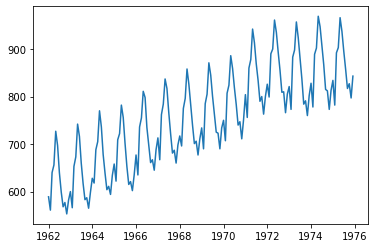

In [8]:
import matplotlib.pyplot as plt
plt.plot(mp_ind)

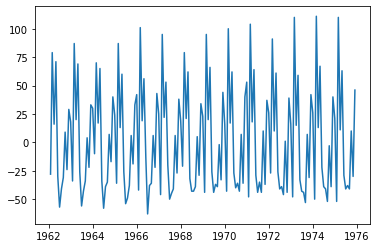

In [9]:
plt.plot(mp_ind.diff())

In [10]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

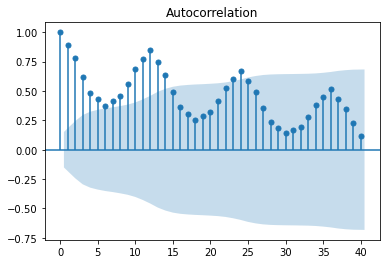

In [12]:
plot_acf(mp_ind.Production, lags=40);

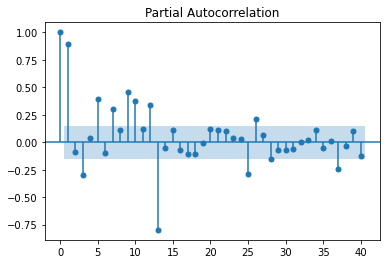

In [13]:
plot_pacf(mp_ind.Production, lags=40);

In [14]:
# so we now know p= 2, q= 0, d=1

In [18]:
train= mp_ind.iloc[0:152]
test= mp_ind.iloc[152:168]

<AxesSubplot:xlabel='Date'>

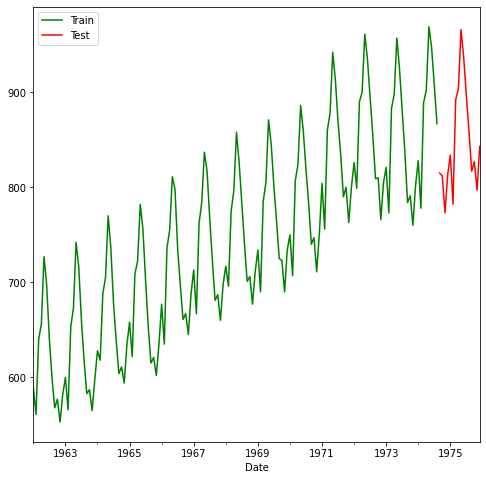

In [19]:
plt.figure(figsize =(8 , 8))
train['Production'].plot(legend = True , label = "Train" , color ="green")
test['Production'].plot(legend = True , label = "Test" , color ="red")

In [42]:
model= ARIMA(mp_ind, order=(2,2,0))
result= model.fit()
forecast_values= result.forecast(steps=12)

C:\Users\Prajwal\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M

In [43]:
forecast_values[0]

array([ 840.69394745,  863.1522169 ,  873.98296111,  890.00584612,
        903.75343004,  918.46355721,  932.75271849,  947.20657661,
        961.5787159 ,  975.97239924,  990.34446882, 1004.71292985])

In [44]:
forecast_values_df= pd.DataFrame(forecast_values[0])

In [45]:
date_for_pred = ['1976-01-01' , '1976-02-01' ,
'1976-03-01', '1976-04-01','1976-05-01',
'1976-06-01', '1976-07-01','1976-08-01',
'1976-09-01', '1976-10-01','1976-11-01',
'1976-12-01']

In [46]:
forecast_values_df = pd.concat([ pd.Series(date_for_pred ) , forecast_values_df] , axis = 1)

In [47]:
l1=["Date", "Production"]

In [48]:
forecast_values_df.columns=l1

In [49]:
forecast_values_df

,Date,Production
0,1976-01-01,840.693947
1,1976-02-01,863.152217
2,1976-03-01,873.982961
3,1976-04-01,890.005846
4,1976-05-01,903.753430
5,1976-06-01,918.463557
6,1976-07-01,932.752718
7,1976-08-01,947.206577
8,1976-09-01,961.578716
9,1976-10-01,975.972399


In [50]:
forecast_values_df.Date = pd.to_datetime(forecast_values_df.Date, infer_datetime_format= True )

forecast_values_df = forecast_values_df.set_index(['Date'])

<AxesSubplot:xlabel='Date'>

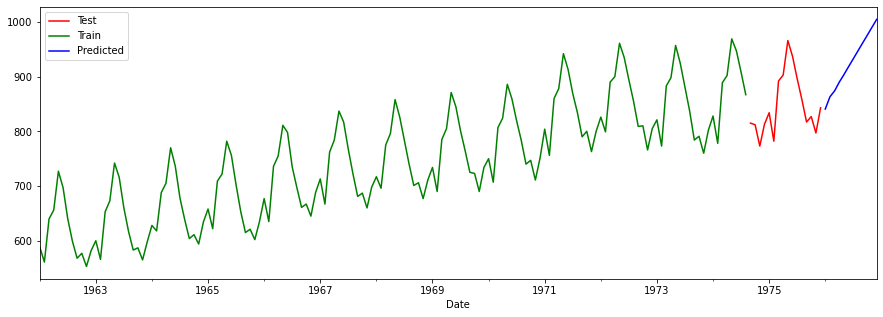

In [51]:
plt.figure(figsize=(15,5))
test['Production'].plot(legend = True , label = "Test" , color ="red")
train['Production'].plot(legend = True , label = "Train" , color ="green")
forecast_values_df['Production'].plot(legend = True , label = "Predicted" , color ="blue")

In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima

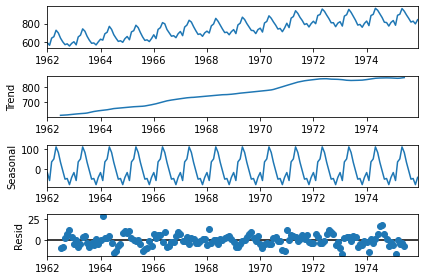

In [55]:
graph = seasonal_decompose(mp_ind)
graph.plot();

In [56]:
auto_arima(mp_ind, seasonal=True, m=12)

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [66]:
sarima_model= SARIMAX(mp_ind, order=(2, 0, 0),seasonal_order=(0, 1, 1, 12))
sarima_result= sarima_model.fit()
sarima_result_1975= sarima_result.predict(start= 152, end= 168)
sarima_result_1976= sarima_result.predict(start= 168, end= 179)

C:\Users\Prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Prajwal\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


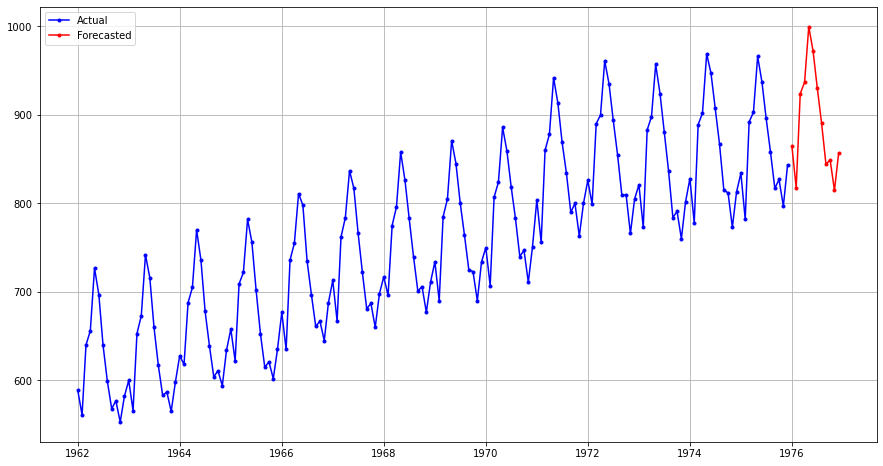

In [61]:
plt.figure(figsize=(15,8))
plt.plot(mp_ind, marker=".", color="blue", label="Actual")
plt.plot(sarima_result_1976, marker=".", color="red", label="Forecasted")
plt.legend()
plt.grid()

In [67]:
error= mp_ind.Production[152:168]-sarima_result_1975

In [68]:
sarima_mse= np.mean(np.square(error))
sarima_mse

35.204164154437045